<a href="https://colab.research.google.com/github/luisr96/Delivery-Routing-for-BreakfastFiesta/blob/main/clusteringalgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


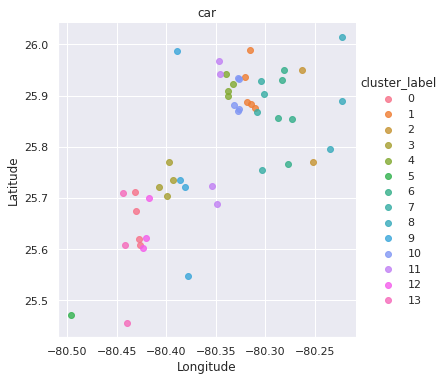

In [2]:
import urllib.request
import requests
import json
import pandas as pd
import random
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
sns.set_theme()

num = 14

# import data

#import the csv you got from geocod.io
df = pd.read_csv('OrderLog_geocodio_afea61deb3954c535184d722e46101fbcd12a23f.csv')

# make a dataframe with all rows and the following columns:
df_deliveries = df.loc[:,['ID', 'Client','Latitude','Longitude']]

# keep rows that don't have 0 as latitude (remove pickup orders)
df_deliveries = df_deliveries[df_deliveries['Latitude'] != 0]

kmeans = KMeans(n_clusters = num, init ='k-means++')

kmeans.fit(df_deliveries[df_deliveries.columns[3:4]]) # Compute k-means clustering.

df_deliveries['cluster_label'] = kmeans.fit_predict(df_deliveries[df_deliveries.columns[3:4]])

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.

labels = kmeans.predict(df_deliveries[df_deliveries.columns[3:4]]) # Labels of each point

df_deliveries.drop(df_deliveries.columns[0], axis=1, inplace=True)

df_deliveries.to_csv(f"deliverydata_cluster{num}.csv")

sns.lmplot('Longitude', 'Latitude', data=df_deliveries, fit_reg=False, hue='cluster_label').set(title='car').savefig(f"clusters{num}.png")
